In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B476-386C

 Directory of C:\Users\SFC1\Desktop\Project\Project_Phase_1

02/12/2023  10:43 PM    <DIR>          .
02/12/2023  10:43 PM    <DIR>          ..
02/12/2023  03:22 PM    <DIR>          .ipynb_checkpoints
02/12/2023  03:46 PM           142,555 bom.movie_gross.csv
02/12/2023  10:43 PM           162,021 Project.ipynb
02/12/2023  03:15 PM                17 README.md
02/12/2023  03:46 PM         1,184,685 rt.movie_info.tsv
02/12/2023  03:46 PM         9,395,716 rt.reviews.tsv
02/12/2023  03:46 PM        11,852,240 title.basics.csv
02/12/2023  03:46 PM         1,950,137 title.ratings.csv
02/12/2023  03:46 PM           422,521 tn.movie_budgets.csv
               8 File(s)     25,109,892 bytes
               3 Dir(s)  217,538,613,248 bytes free


# Loading and looking into the ratings data 

In [3]:
Ratings = pd.read_csv('title.ratings.csv')

In [4]:
Ratings_df = pd.DataFrame(Ratings)
Ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
Ratings_df.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


# Loading and looking into the Budgets data

In [6]:
Budgets = pd.read_csv('tn.movie_budgets.csv')
Budgets_df = pd.DataFrame(Budgets)
Budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
Budgets_df.isnull()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5777,False,False,False,False,False,False
5778,False,False,False,False,False,False
5779,False,False,False,False,False,False
5780,False,False,False,False,False,False


In [7]:
Budgets_df.shape

(5782, 6)

# Is there a Correlation between production budget and domestic gross

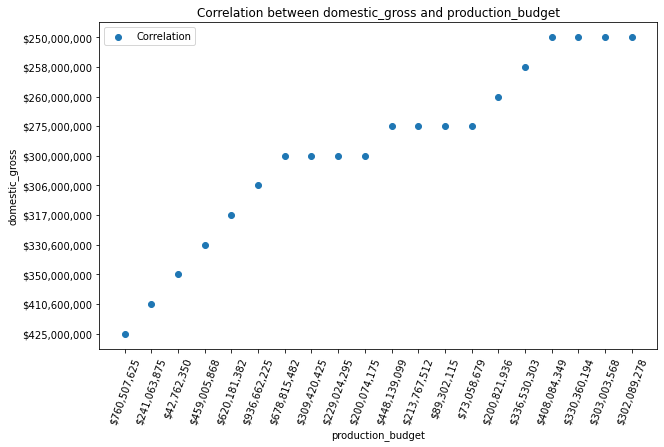

In [38]:
x = Budgets_df['domestic_gross'].head(20)
y = Budgets_df['production_budget'].head(20)

plt.figure(figsize=(10,6))

plt.scatter(x, y, label = "Correlation")
plt.xticks(rotation = 70)
plt.xlabel('production_budget')
plt.ylabel('domestic_gross')

plt.title('Correlation between domestic_gross and production_budget')
plt.legend()
plt.show()

# Removing null values

In [23]:
main_data = Budgets_df [['domestic_gross', 'production_budget']]
main_data

,domestic_gross,production_budget
0,"$760,507,625","$425,000,000"
1,"$241,063,875","$410,600,000"
2,"$42,762,350","$350,000,000"
3,"$459,005,868","$330,600,000"
4,"$620,181,382","$317,000,000"
...,...,...
5777,$0,"$7,000"
5778,"$48,482","$6,000"
5779,"$1,338","$5,000"
5780,$0,"$1,400"


In [44]:
main_data.dropna()

,domestic_gross,production_budget
0,"$760,507,625","$425,000,000"
1,"$241,063,875","$410,600,000"
2,"$42,762,350","$350,000,000"
3,"$459,005,868","$330,600,000"
4,"$620,181,382","$317,000,000"
...,...,...
5777,$0,"$7,000"
5778,"$48,482","$6,000"
5779,"$1,338","$5,000"
5780,$0,"$1,400"


## A linear view

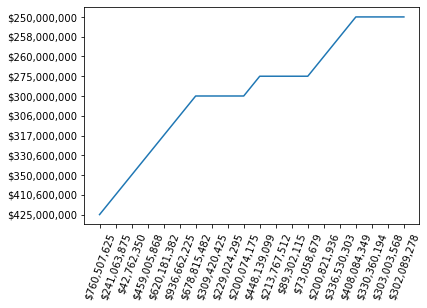

In [43]:
plt.plot(x, y)
plt.xticks(rotation = 70)
plt.show()

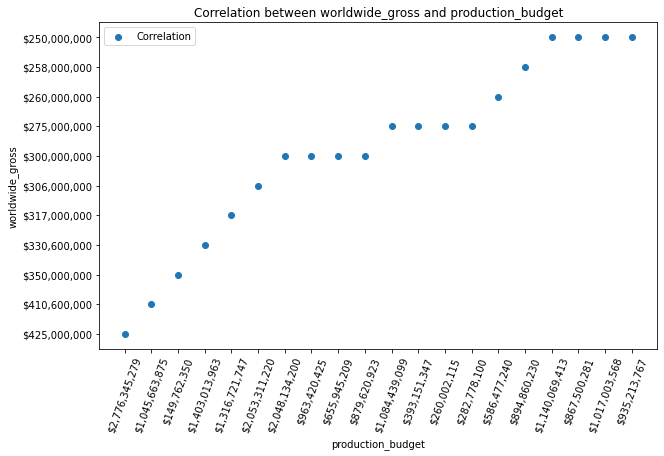

In [47]:
x = Budgets_df['worldwide_gross'].head(20)
y = Budgets_df['production_budget'].head(20)

plt.figure(figsize=(10,6))

plt.scatter(x, y, label = "Correlation")
plt.xticks(rotation = 70)
plt.xlabel('production_budget')
plt.ylabel('worldwide_gross')

plt.title('Correlation between worldwide_gross and production_budget')
plt.legend()
plt.show()

# Is there a correlation between production_budget and worldwide_gross

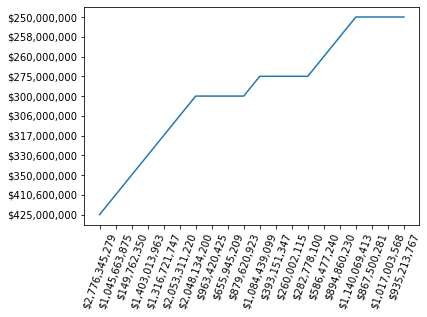

In [48]:
plt.plot(x, y)
plt.xticks(rotation = 70)
plt.show()

# Side by side view domestic and worlwide gross against budget

No handles with labels found to put in legend.


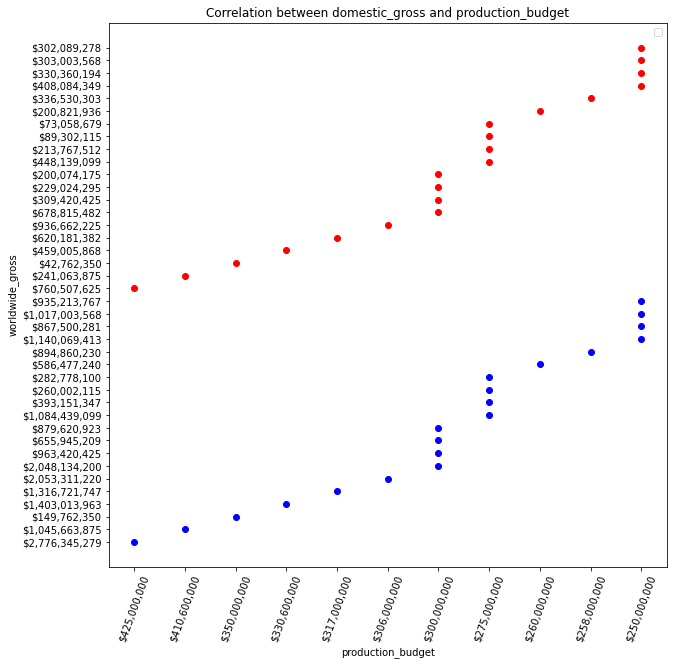

In [65]:
x = Budgets_df['worldwide_gross'].head(20)
y = Budgets_df['production_budget'].head(20)
z = Budgets_df['domestic_gross'].head(20)


plt.figure(figsize=(10,10))

plt.scatter(y, x, c = "blue")
plt.scatter(y, z, c = "red")
plt.xticks(rotation = 70)
plt.xlabel('production_budget')
plt.ylabel('worldwide_gross')

plt.title('Correlation between domestic_gross and production_budget')
plt.legend()
plt.show()

# Looking into and loading the MovieTitles data

In [10]:
MovieTitles = pd.read_csv('title.basics.csv')
MovieTitle_df = pd.DataFrame(MovieTitles)
MovieTitle_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


# Joining the MovieTitle and Ratings data

In [11]:
joined_df = MovieTitle_df.set_index('tconst').join(Ratings_df.set_index('tconst'))
joined_df.head()


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


# Sorting data by averagerating

In [12]:
joined_df_votes = joined_df.sort_values('averagerating')
joined_df_votes

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64.0,Drama,1.0,5.0
tt3262718,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama,1.0,223.0
tt5277828,Death Forest 3,Death Forest 3,2015,64.0,Horror,1.0,268.0
tt1611056,Hito no sabaku,Hito no sabaku,2010,121.0,Drama,1.0,449.0
tt8654080,Overdose of Gore: Crime born Crime,Overdose of Gore: Crime born Crime,2015,46.0,Horror,1.0,21.0
...,...,...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN


# Dropping Missing Values for the Data

In [13]:
joined_df_votes = joined_df_votes.dropna()
joined_df_votes

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64.0,Drama,1.0,5.0
tt3262718,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama,1.0,223.0
tt5277828,Death Forest 3,Death Forest 3,2015,64.0,Horror,1.0,268.0
tt1611056,Hito no sabaku,Hito no sabaku,2010,121.0,Drama,1.0,449.0
tt8654080,Overdose of Gore: Crime born Crime,Overdose of Gore: Crime born Crime,2015,46.0,Horror,1.0,21.0
...,...,...,...,...,...,...,...
tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5.0
tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6.0
tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5.0


# Looking into the highest ratings

In [11]:
Highest_rating = joined_df_votes.tail(10)
Highest_rating

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5.0
tt4960818,Revolution Food,Revolution Food,2015,70.0,Documentary,10.0,8.0
tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5.0
tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary,10.0,5.0
tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7.0
tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5.0
tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6.0
tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5.0
tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5.0


### Comments
A look into the data shows that Documentaries have the highest rating

# Is there any relationship between runtime_minutes and averagerating

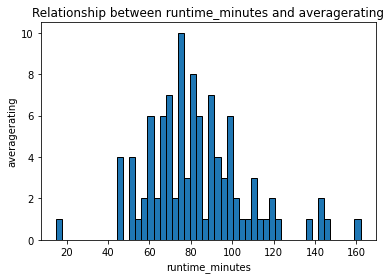

In [14]:
x = joined_df_votes['runtime_minutes'].head(100)
y = joined_df_votes['averagerating'].head(100)
plt.hist(x, bins = 50, edgecolor='black')

plt.xlabel('runtime_minutes')
plt.ylabel('averagerating')
plt.title('Relationship between runtime_minutes and averagerating')
plt.show()

### From a visual point the highest ratings come from movies with average minutes

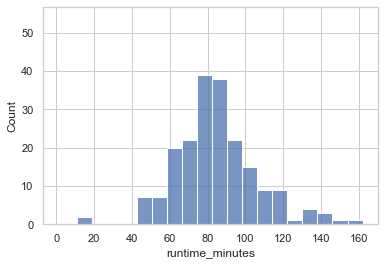

In [87]:
x = joined_df_votes['runtime_minutes'].head(200)
y = joined_df_votes['averagerating'].head(200)
sns.histplot(x)
sns.histplot(y)
plt.show()

In [15]:
Max_Values = joined_df_votes.max()
Max_Values

primary_title      Šiška Deluxe
original_title           ärtico
start_year                 2019
runtime_minutes           51420
genres                  Western
averagerating                10
numvotes            1.84107e+06
dtype: object

In [16]:
Genres = joined_df_votes['genres']
Genres.unique()

array(['Drama', 'Horror', 'Comedy,Drama', 'Adventure,Biography,Comedy',
       'Adventure,Animation,Family', 'Horror,Thriller', 'Comedy',
       'Comedy,Drama,Horror', 'Documentary', 'Action,Drama,Horror',
       'Adventure', 'Romance', 'Drama,Family', 'Drama,Family,Romance',
       'Action,Horror,Thriller', 'Drama,Horror,Thriller',
       'Comedy,Fantasy', 'Fantasy,Mystery,Romance', 'Documentary,Music',
       'Comedy,Drama,Romance', 'Drama,Romance', 'Adventure,Comedy',
       'Adventure,Drama,Sci-Fi', 'Animation', 'Drama,Music',
       'Adventure,Drama,Romance', 'Music', 'Western', 'Action,Sci-Fi,War',
       'Comedy,History,Horror', 'Comedy,Romance', 'Sci-Fi',
       'Crime,Thriller', 'Crime', 'Action,Horror', 'Crime,Drama',
       'Action,Crime,Drama', 'Action,Sci-Fi', 'Documentary,Sport',
       'Comedy,Drama,Family', 'Drama,Thriller', 'Animation,Comedy,Family',
       'Action,Crime,Horror', 'Action,Fantasy,Sci-Fi',
       'Action,Adventure,Drama', 'Comedy,Horror', 'Drama,War',
  

In [17]:
nec_data = joined_df_votes [['genres', 'averagerating']]
nec_data.head()

,genres,averagerating
tconst,,
tt8446392,Drama,1.0
tt3262718,Drama,1.0
tt5277828,Horror,1.0
tt1611056,Drama,1.0
tt8654080,Horror,1.0


In [18]:
nec_data = nec_data.reset_index(drop=True)
nec_data.head()

,genres,averagerating
0,Drama,1.0
1,Drama,1.0
2,Horror,1.0
3,Drama,1.0
4,Horror,1.0


# nec_data_grouped = nec_data.groupby('genres')
nec_data_grouped.head()

## SOME ROUGH WORK

# Looking into the Gross data

In [2]:
Gross = pd.read_csv('bom.movie_gross.csv')
Gross_df = pd.DataFrame(Gross)
Gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
Gross_df.shape

(3387, 5)

In [89]:
Gross_df.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


## Visualization of the null values

<AxesSubplot:>

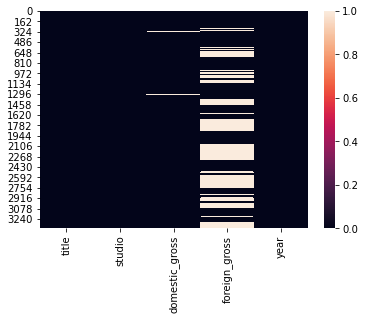

In [4]:
sns.heatmap(Gross_df.isna())

# Cleaning the data

In [5]:
Gross_df_clean = Gross_df.dropna()
Gross_df_clean

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [6]:
Gross_df_clean['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [7]:
domestic_gross_int = Gross_df_clean['domestic_gross'].astype(int)
domestic_gross_int

0       415000000
1       334200000
2       296000000
3       292600000
4       238700000
          ...    
3275         1400
3286       725000
3309        10000
3342        93200
3353        43200
Name: domestic_gross, Length: 2007, dtype: int32

No handles with labels found to put in legend.


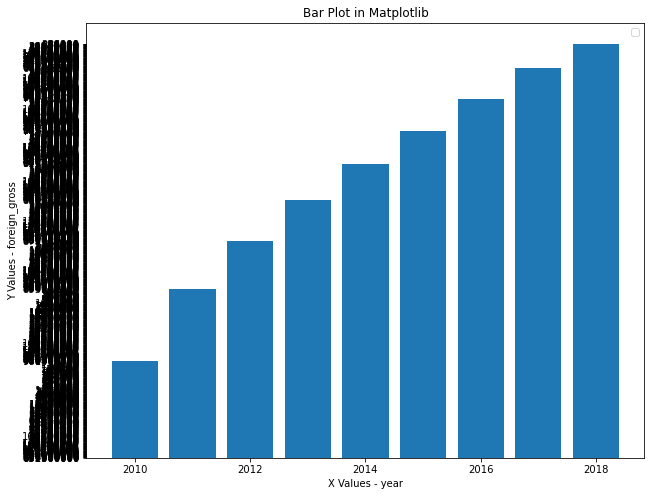

In [28]:
x = Gross_df_clean['year']
y = Gross_df_clean['foreign_gross']
plt.figure(figsize=(10,8))

plt.bar(x, y)

plt.xlabel('X Values - year')
plt.ylabel('Y Values - foreign_gross')
plt.yticks(rotation = 360)

plt.title('Bar Plot in Matplotlib')
plt.legend()

plt.show()